In [16]:
#pip install openpyxl 

Note: you may need to restart the kernel to use updated packages.


In [17]:
#import library
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tabulate import tabulate 
import pandas as pd

In [18]:
# Step 1: Prepare the data
# Replace these with your actual data
budgets = np.array([
    [4367, 1088, 0, 0, 745, 643, 0],        # 2021
    [3783, 1154, 136, 256, 620, 1914,235],  # 2022
    [3454, 1209, 200, 178, 500, 1679,183],  # 2023
    [2446, 1088, 230, 174, 225, 726,119]    # 2024
])

total_sales = np.array([280023, 251995, 222032, 176274])

# Normalize the data
budgets_normalized = budgets / np.sum(budgets, axis=1, keepdims=True)
sales_normalized = total_sales / np.max(total_sales)

In [19]:
# Step 2: Create the model
model = keras.Sequential([
    keras.layers.Dense(14, activation='relu', input_shape=(7,)),
    keras.layers.Dense(14, activation='relu'),
    keras.layers.Dense(1)  # Output layer with 1 unit for predicting sales
])

c:\Users\lkenneth\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# Step 3: Compile the model
model.compile(optimizer='adam', loss='mse')

In [21]:
# Step 4: Train the model
history = model.fit(budgets_normalized, sales_normalized.reshape(-1, 1), epochs=1000, verbose=0)

In [22]:
# Step 5: Make predictions and denormalize
# Use an optimization algorithm to find the best budget allocation
from scipy.optimize import minimize

def objective(x):
    x = x.reshape(1, -1)  # Reshape to 2D array
    predicted_sales = model.predict(x)[0][0]
    return -predicted_sales  # Negative because we want to maximize sales

# Constraint: sum of budget proportions should be 1
def constraint(x):
    return np.sum(x) - 1



In [23]:

# Step 6: Perform optimization
initial_guess = np.mean(budgets_normalized, axis=0)
bounds = [(0, 1) for _ in range(7)]  # Each proportion should be between 0 and 1
constraint = {'type': 'eq', 'fun': constraint}

result = minimize(objective, initial_guess, method='SLSQP', bounds=bounds, constraints=constraint)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

In [24]:
# Step 7: Get optimal budget allocation and denormalize
optimal_budget_normalized = result.x
optimal_budget = optimal_budget_normalized * 7200000  # Use 2025's budget of 7.2M

In [25]:
departments = ['Brand', 'Digital', 'OE', 'Ecom', 'PR', 'Retail', 'Trade_marketing']
total_budget = 7200000
percentages = (optimal_budget / total_budget) * 100

table_data = []
for dept, budget, percentage in zip(departments, optimal_budget, percentages):
    table_data.append([dept, f"${budget:.2f}", f"{percentage:.2f}%"])

print("\nOptimal Budget Split for 2025 (Total: $7,200,000):")
print(tabulate(table_data, headers=['Department', 'Budget', 'Percentage'], tablefmt='grid'))



Optimal Budget Split for 2025 (Total: $7,200,000):
+-----------------+-------------+--------------+
| Department      | Budget      | Percentage   |
+=================+=============+==============+
| Brand           | $3730836.25 | 51.82%       |
+-----------------+-------------+--------------+
| Digital         | $1249994.47 | 17.36%       |
+-----------------+-------------+--------------+
| OE              | $0.53       | 0.00%        |
+-----------------+-------------+--------------+
| Ecom            | $185002.86  | 2.57%        |
+-----------------+-------------+--------------+
| PR              | $569639.49  | 7.91%        |
+-----------------+-------------+--------------+
| Retail          | $1297175.18 | 18.02%       |
+-----------------+-------------+--------------+
| Trade_marketing | $167351.21  | 2.32%        |
+-----------------+-------------+--------------+


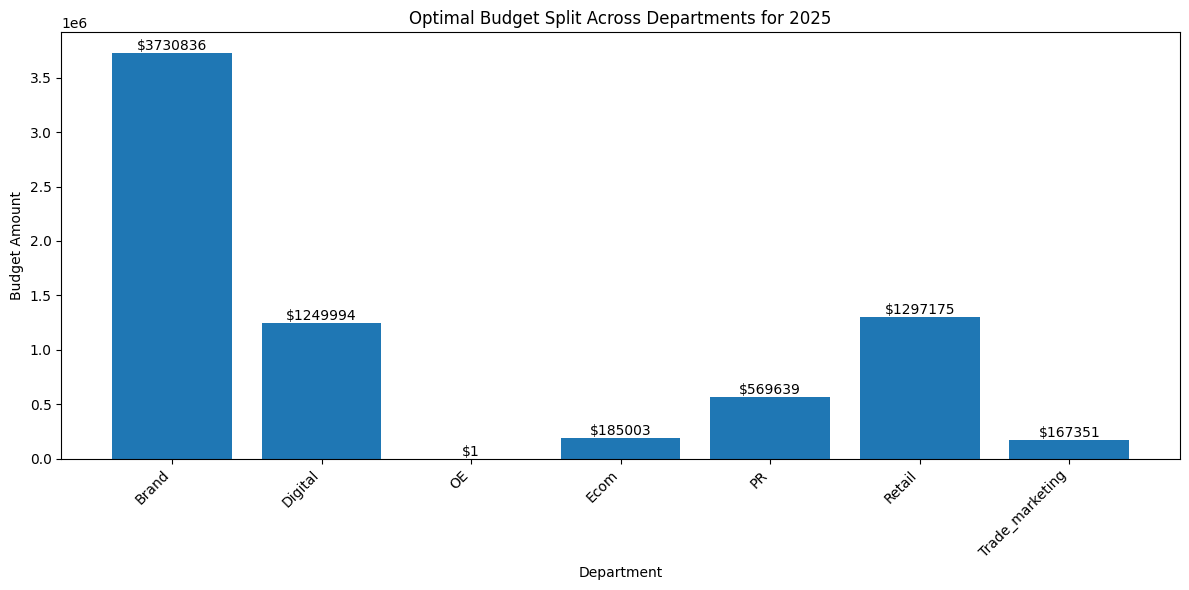

In [26]:
# Step 9: Visualize the optimal budget split for 2025
plt.figure(figsize=(12, 6))
plt.bar(departments, optimal_budget)
plt.title('Optimal Budget Split Across Departments for 2025')
plt.xlabel('Department')
plt.ylabel('Budget Amount')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(optimal_budget):
    plt.text(i, v, f'${v:.0f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [27]:
# Step 10: Calculate and print the percentage allocation for 2025
percentages = (optimal_budget / 7200000) * 100
print("\nPercentage Allocation for 2025:")
for dept, percentage in zip(departments, percentages):
    print(f"{dept}: {percentage:.2f}%")

# Predict total sales for 2025
predicted_sales_2025 = -objective(optimal_budget_normalized)  # Negative because objective returns negative sales
predicted_sales_2025_denormalized = predicted_sales_2025 * np.max(total_sales)
print(f"\nPredicted Total Sales for 2025: ${predicted_sales_2025_denormalized:.2f}")


Percentage Allocation for 2025:
Brand: 51.82%
Digital: 17.36%
OE: 0.00%
Ecom: 2.57%
PR: 7.91%
Retail: 18.02%
Trade_marketing: 2.32%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

Predicted Total Sales for 2025: $243652.99


In [29]:
# Save to Excel file using pandas
df = pd.DataFrame(table_data, columns=['Department', 'Budget', 'Percentage'])
df.to_excel("budget_split_nn.xlsx", index=False)

print("\nResults saved to budget_split_nn.xlsx")


Results saved to budget_split_nn.xlsx
